<a href="https://colab.research.google.com/github/StillWork/ds-lab/blob/master/gg_51_MNIST_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 로드

In [1]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()   #이미지를 얻어준다. test, train 용

In [3]:
train_images.shape, train_labels.shape
#6만장의 사진, 각 사진이 28 x 28

((60000, 28, 28), (60000,))

## MNIST 이미지 확인 및 데이터 전처리

<function matplotlib.pyplot.show(close=None, block=None)>

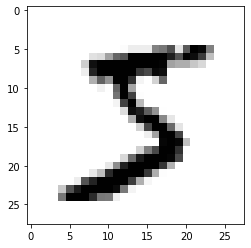

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(train_images[0], cmap=plt.cm.binary)  #binary: 흑백으로 처리
plt.show

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_labels[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [7]:
#MLP: 입력으로 벡터만 받는다
#데이터를 한줄로 펴서 넣는다.
#28*28=784를 input 데이터로 받는다

train_images_flat = train_images.reshape(60000, 28*28)
train_images_flat = train_images_flat.astype('float32')/255

test_images_flat = test_images.reshape(10000, 28*28)
test_images_flat = test_images_flat.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
#1,2,3,4,5 를 코딩언어로 바꿔주다 5를 0,0,0,0,1 이런식으로

In [8]:
train_labels[:5]

#코딩언어로 바꾼 결과

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

## MLP 로 구현(케라스 사용)

In [66]:
from keras import layers
from keras import models

model = models.Sequential()
#히든 계층
model.add(layers.Dense(100, activation='relu', input_shape = (28*28,)))  #Dense: 전 연결망   #28*28: 784
#784개 INPUT 데이터  X 100개 parameter = 78400(경우의 수) + 100(bias가 100개 필요하다)
model.add(layers.Dense(100, activation='relu')) #(100개에서 100개로 넘어오다 100X100 + 100개의 bias)  #10100
#출력 계층
model.add(layers.Dense(10, activation='softmax'))  #softmax로 마지막에 분류작업을 하겠다
#히든 계층이 2개 있고, 출력 계층이 한 개 있다.   #100 x 10 + 10 = 1010
model.summary()



Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_19 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_20 (Dense)             (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.compile(optimizer= 'rmsprop',   #rmsprop: 가속도를 고려한 경사 하강도
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])   #정확도를 측정하겠다

In [68]:
model.fit(train_images_flat, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 2s 2ms/step - loss: 0.2706 - accuracy: 0.9204
Epoch 2/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1191 - accuracy: 0.9643
Epoch 3/5
938/938 [==============================] - 2s 2ms/step - loss: 0.0847 - accuracy: 0.9750
Epoch 4/5
938/938 [==============================] - 2s 2ms/step - loss: 0.0663 - accuracy: 0.9800
Epoch 5/5
938/938 [==============================] - 2s 2ms/step - loss: 0.0545 - accuracy: 0.9839


In [69]:
test_loss, test_acc = model.evaluate(test_images_flat, test_labels)  # model.evaluate 모델의 성능을 보는 함수
print('test_acc = ',test_acc)

313/313 [==============================] - 0s 619us/step - loss: 0.1001 - accuracy: 0.9720
test_acc =  0.972000002861023


## CNN 모델 생성

In [89]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape = (28, 28, 1)))  #shape을 맞추어주다
#한 그림을 분류하는 필터의 개수는 32개 이고, 각각의 필터는 3 X 3 사이즈이다
#input의 크기는 28 x 28 x 1 이다, 마지막에 1은 흑백사진이라는 뜻이다.
#mlp는 안해도 되는데 cnn부터는 shape을 맞추어 주어야 한다. 

model.add(layers.MaxPooling2D((2,2)))  
#maxpoolpling 으로 2 x 2 으로 사이즈를 반으로 줄이고

model.add(layers.Conv2D(64, (3,3), activation='relu'))
#한번 더 하다 
#이번엔 필터를 64개 만들다 
#그에 따른 feature map이 나오다
#계속 feature를 통과시키는 이유는, 이미지 구성이 복잡하기 때문에 

model.add(layers.MaxPooling2D((2,2)))
#maxpooling으로 사이즈 또 줄이고
model.add(layers.Conv2D(64, (3,3), activation='relu'))

model.add(layers.Flatten()) #flatten으로 feature들을 한 줄로 쫙 피다
model.add(layers.Dense(10, activation='softmax'))
#전연결망으로 그림 10개로 줄여  뽑아내다  -> 0~ 9 까지 10개에서 어떤 숫자의 확률이 가장 큰지  찾아내는 이러한 망을 만들다

model.summary()   



#(None, 26, 26, 32): 3 x 3 를 채울려면  양 쪽에 한개씩 모자르므로 28이 아니라 26 , 26 x 26이 되다'
#feature map이 32개 있었기 때문에 depth 깊이가 32가 되다
#param 320: 한 필터마다 필요한 개수-9개  x 32개  + 32(bias)   : 9 x 32 + 32 = 320

#max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)  : maxpooling으로 필터 하나당 13 x 13으로 두개 씩 쪼개지다. 즉, 사이즈가 1/2배 되다



#conv2d_4 (Conv2D)            (None, 11, 11, 64)  : 필터 양쪽에 한개씩 빠지므로 13 -> 11
#param 18496  : (필터의 크기)9 x 64(필터 개수) x 32(각 필터 마다 depth 깊이) + 64(bias)


#max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)    : maxpooling 반으로 줄어서 11 -> 5.5인데  5가 되다

#conv2d_5 (Conv2D)            (None, 3, 3, 64)    : 9 x 64 x 64 + 64 = 36928

#flatten_1 (Flatten)          (None, 576)    한 줄로 피다 : 3 x 3 x 64 = 576

#dense_22 (Dense)             (None, 10)   : 576을 10개로 줄이다 : 576 x 10 + 10(bias)= 5770

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)               

## 훈련

In [90]:
model.compile(optimizer= 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [91]:
train_images.shape
train_images_cnn = train_images.reshape(-1, 28, 28, 1)
train_images_cnn.shape
test_images_cnn = test_images.reshape(-1, 28, 28, 1)

In [92]:
train_labels.shape

(60000,)

In [95]:
model.fit(train_images_cnn, train_labels, epochs=3, batch_size=64)

Epoch 1/3


ValueError: Creating variables on a non-first call to a function decorated with tf.function.

In [97]:
test_loss, test_acc = model.evaluate(test_images_cnn, test_labels)
print('test_acc = ',test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 63.7871 - accuracy: 0.1528
test_acc =  0.15279999375343323
